In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.neighbors import KNeighborsClassifier

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

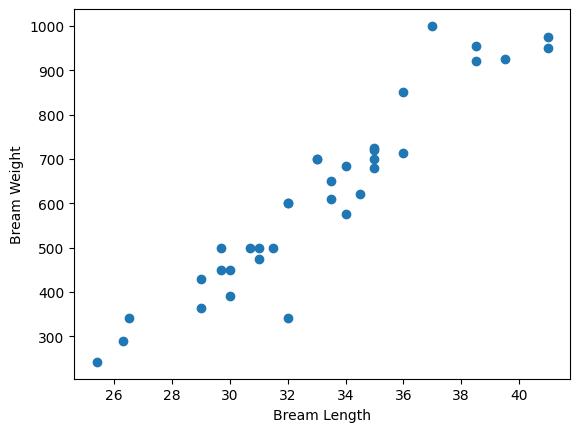

In [4]:
# 도미 bream
plt.scatter(bream_length, bream_weight)
plt.xlabel('Bream Length')
plt.ylabel('Bream Weight')
plt.show()

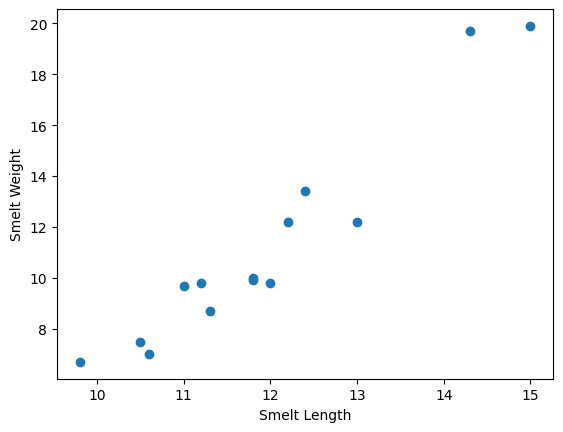

In [5]:
# 빙어 smelt
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('Smelt Length')
plt.ylabel('Smelt Weight')
plt.show()

In [6]:
import pandas as pd
df = pd.read_csv('Fish.csv')

In [23]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [24]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [25]:
kn = KNeighborsClassifier()

fish_data = []
fish_target = [1] * 35 + [0] * 14

for l, w in zip(length, weight):
    fish_data.append([l, w])

kn.fit(fish_data, fish_target)

prediction = kn.predict([[30, 600]])

if prediction == [1]:
    print('This fish is "bream"')
elif prediction == [0]:
    print('This fish is "smelt"')

This fish is "bream"


In [26]:
### 모델 저장하기
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(kn, f)

### 모델 불러오기 
with open("model.pkl", "rb") as f:
    fish_model = pickle.load(f)

In [27]:
fish_model.predict([[10, 20]])

array([0])

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fish_data)

ValueError: not enough values to unpack (expected 4, got 2)

In [31]:
s = 0
for i in fish_target:
    s = s + i
print(s)

35


In [19]:
len(smelt_length)

14